# About

[Dataset](https://www.kaggle.com/datasets/arslanali4343/real-estate-dataset "kaggle.com/datasets/arslanali4343/real-estate-dataset") concerns housing values in suburbs of Boston.  

Number of Instances: 506  
Number of Attributes: 13 continuous attributes  
(including "class" attribute "MEDV")  
Attribute Information:
  
    CRIM -per capita crime rate by town

    NOX -nitric oxides concentration (parts per 10 million)

    RM -average number of rooms per dwelling

    AGE -proportion of owner-occupied units built prior to 1940

    DIS -weighted distances to five Boston employment centres
    
    RAD -index of accessibility to radial highways
    
    PTRATIO - pupil-teacher ratio by town 
    
    MEDV -Median value of owner-occupied homes in 1000's dollars

---

# Hypothesis

 Let's consider development of world and constantly increasing average quality of life as axiom. Then let's state that the better surroundings of the house the more valuable it is. For some people it's also important to be close to the centre of the city, so we will consider it as an argument for price increase too. What is important too is age of the house, as communications tear over time, its logical for new houses to be more developed overall rather than olds ones, so, consequently, more valuable too.  

So, putting it all in one let's state the hypothesis: 
> _House is more valuable if it has good accessibility to the city centre, has a lot of rooms, is of moderate age, has good air quality around it_

Further let's observe the dataset and *prove* or *refute* that hypothesis

---

# Manipulating with data

In [49]:
import pandas as pd

<IPython.core.display.Javascript object>

In [50]:
from numpy import *

<IPython.core.display.Javascript object>

In [51]:
%load_ext nb_black

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

In [52]:
def parse_data():
    global data, data1
    data = pd.read_csv("data.csv")
    data1 = pd.read_csv("data.csv")

<IPython.core.display.Javascript object>

In [53]:
def clean_data(to_drop):
    global data, data1
    data = data.drop(columns=to_drop)
    data1 = data1.drop(columns=to_drop)

<IPython.core.display.Javascript object>

In [54]:
def round1(x=1):
    if round(x) % 2:
        return round(x)
    else:
        return 1 + round(x) if 1 + round(x) - x < x - round(x) + 1 else round(x) - 1

<IPython.core.display.Javascript object>

In [55]:
def round2(x=0):
    if round(x) % 2:
        return 1 + round(x) if 1 + round(x) - x < x - round(x) + 1 else round(x) - 1
    else:
        return round(x)

<IPython.core.display.Javascript object>

In [56]:
parse_data()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


<IPython.core.display.Javascript object>

---
Modify some values and remove NaNs for further plotting:

In [57]:
parse_data()
clean_data(["CRIM", "B", "ZN", "CHAS", "TAX", "B", "INDUS", "LSTAT"])
print(
    "before modifying: \n",
    data,
    "\n\n",
    sep="\n",
)
meanRM = 7
for index, row in data.iterrows():
    data.at[index, "DIS"] = round1(row["DIS"])
    # data.at[index, "B"] = 100 * round(row["B"] / 100)
    data.at[index, "RM"] = round(row["RM"]) if not isnan(row["RM"]) else meanRM
    data.at[index, "NOX"] = round2(10 * row["NOX"]) / 10
    data.at[index, "PTRATIO"] = round1(row["PTRATIO"])
    data.at[index, "AGE"] = 10 * round1(row["AGE"] / 10)
    data.at[index, "RAD"] = round1(row["RAD"])
for index, row in data1.iterrows():
    data1.at[index, "RM"] = row["RM"] if not isnan(row["RM"]) else meanRM
nm = "md"
data = data.rename(
    {
        "DIS": f"{nm}DIS",
        "RM": f"{nm}RM",
        "NOX": f"{nm}NOX",
        "PTRATIO": f"{nm}PTRATIO",
        "AGE": f"{nm}AGE",
        "RAD": f"{nm}RAD",
    },
    axis="columns",
)
data = pd.concat([data1.drop(columns=["MEDV"]), data], axis=1)
print(
    "after modifying: \n",
    data,
    sep="\n",
)

before modifying: 

       NOX     RM   AGE     DIS  RAD  PTRATIO  MEDV
0    0.538  6.575  65.2  4.0900    1     15.3  24.0
1    0.469  6.421  78.9  4.9671    2     17.8  21.6
2    0.469  7.185  61.1  4.9671    2     17.8  34.7
3    0.458  6.998  45.8  6.0622    3     18.7  33.4
4    0.458  7.147  54.2  6.0622    3     18.7  36.2
..     ...    ...   ...     ...  ...      ...   ...
506  0.561  6.980  89.0  2.0980    3     23.0  12.0
507  0.561  6.980  76.0  2.6540    3     23.0  32.0
508  0.561  6.123  98.0  2.9870    3     23.0  54.0
509  0.561  6.222  34.0  2.5430    3     23.0  67.0
510  0.561  6.760  67.0  2.9870    3     23.0  24.0

[511 rows x 7 columns]



after modifying: 

       NOX     RM   AGE     DIS  RAD  PTRATIO  mdNOX  mdRM  mdAGE  mdDIS  \
0    0.538  6.575  65.2  4.0900    1     15.3    0.6   7.0   70.0    5.0   
1    0.469  6.421  78.9  4.9671    2     17.8    0.4   6.0   70.0    5.0   
2    0.469  7.185  61.1  4.9671    2     17.8    0.4   7.0   70.0    5.0   
3    0

<IPython.core.display.Javascript object>

In [58]:
flag = False
for index, row in data.iterrows():
    for col in [
        "NOX",
        "RM",
        "AGE",
        "DIS",
        "RAD",
        "PTRATIO",
        f"{nm}NOX",
        f"{nm}RM",
        f"{nm}AGE",
        f"{nm}DIS",
        f"{nm}RAD",
        f"{nm}PTRATIO",
        "MEDV",
    ]:
        if isnan(row[col]):
            print(col, ":", index, "is NaN")
            flag = True
if not flag:
    print("No NaNs spotted in data")

No NaNs spotted in data


<IPython.core.display.Javascript object>

`data` was modified for plotting via rounding values, adding them as columns with name `mdOLD_NAME` and removing NaNs.  
As we can see, the `data` is clean out of NaNs and incorrect data types, so there's no obstacles to proceed.

In [59]:
data

,NOX,RM,AGE,DIS,RAD,PTRATIO,mdNOX,mdRM,mdAGE,mdDIS,mdRAD,mdPTRATIO,MEDV
0,0.538,6.575,65.2,4.0900,1,15.3,0.6,7.0,70.0,5.0,1,15.0,24.0
1,0.469,6.421,78.9,4.9671,2,17.8,0.4,6.0,70.0,5.0,1,17.0,21.6
2,0.469,7.185,61.1,4.9671,2,17.8,0.4,7.0,70.0,5.0,1,17.0,34.7
3,0.458,6.998,45.8,6.0622,3,18.7,0.4,7.0,50.0,7.0,3,19.0,33.4
4,0.458,7.147,54.2,6.0622,3,18.7,0.4,7.0,50.0,7.0,3,19.0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,0.561,6.980,89.0,2.0980,3,23.0,0.6,7.0,90.0,3.0,3,23.0,12.0
507,0.561,6.980,76.0,2.6540,3,23.0,0.6,7.0,70.0,3.0,3,23.0,32.0
508,0.561,6.123,98.0,2.9870,3,23.0,0.6,6.0,90.0,3.0,3,23.0,54.0
509,0.561,6.222,34.0,2.5430,3,23.0,0.6,6.0,30.0,3.0,3,23.0,67.0


<IPython.core.display.Javascript object>

In [60]:
data.describe()

,NOX,RM,AGE,DIS,RAD,PTRATIO,mdNOX,mdRM,mdAGE,mdDIS,mdRAD,mdPTRATIO,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.554757,6.294560,68.616243,3.783876,9.485323,18.500000,0.548728,6.277886,66.555773,3.755382,8.866928,18.686888,22.682192
std,0.115310,0.703852,28.099130,2.098631,8.688469,2.200348,0.131184,0.731021,26.757376,2.247623,8.472210,2.398489,9.484262
min,0.385000,3.561000,2.900000,1.129600,1.000000,12.600000,0.400000,4.000000,10.000000,1.000000,1.000000,13.000000,5.000000
25%,0.449000,5.887500,45.050000,2.100350,4.000000,17.400000,0.400000,6.000000,50.000000,3.000000,3.000000,17.000000,17.050000
50%,0.538000,6.211000,77.300000,3.152300,5.000000,19.100000,0.600000,6.000000,70.000000,3.000000,5.000000,19.000000,21.200000
75%,0.624000,6.635000,94.050000,5.118000,24.000000,20.200000,0.600000,7.000000,90.000000,5.000000,23.000000,21.000000,25.000000
max,0.871000,8.780000,100.000000,12.126500,24.000000,23.000000,0.800000,9.000000,90.000000,13.000000,23.000000,23.000000,67.000000


<IPython.core.display.Javascript object>

---

# Key metrics

In [61]:
from scipy.stats import norm
import plotly.express as px

<IPython.core.display.Javascript object>

In [62]:
descriptives = dict()

<IPython.core.display.Javascript object>

In [63]:
def describe_value(value):
    descriptives.update({f"mean_{value}": mean(data[f"{value}"].tolist())})
    descriptives.update({f"std_{value}": std(data[f"{value}"].tolist())})
    descriptives.update({f"median_{value}": median(data[f"{value}"].tolist())})
    descriptives.update({f"max_{value}": max(data[f"{value}"].tolist())})
    descriptives.update({f"min_{value}": min(data[f"{value}"].tolist())})

<IPython.core.display.Javascript object>

In [64]:
def print_descriptives(value):
    print(f"The mean {value} is ${int(1000*round(descriptives[f'mean_{value}'],3))}")

<IPython.core.display.Javascript object>

In [65]:
mean_price = mean(data["MEDV"].tolist())
std_price = std(data["MEDV"].tolist())
median_price = median(data["MEDV"].tolist())
max_price = max(data["MEDV"].tolist())
min_price = min(data["MEDV"].tolist())

print(f"The mean price is ${int(1000*round(mean_price,3))}")
print(f"The max price is ${int(1000*max_price)}")
print(f"The min price is ${int(1000*min_price)}")
print(f"The median price is ${int(1000*median_price)}")
print(f"The standard deviation of price is ${int(1000*round(std_price,3))}")

The mean price is $22682
The max price is $67000
The min price is $5000
The median price is $21200
The standard deviation of price is $9475


<IPython.core.display.Javascript object>

In [66]:
mean_dis = mean(data["DIS"].tolist())
std_dis = std(data["DIS"].tolist())
median_dis = median(data["DIS"].tolist())
max_dis = max(data["DIS"].tolist())
min_dis = min(data["DIS"].tolist())

print(
    f"The mean distance from the house to the city center is {int(1000*round(mean_dis,3))}m"
)
print(
    f"The max distance from the house to the city center is {int(1000*round(max_dis,3))}m"
)
print(
    f"The min distance from the house to the city center is {int(1000*round(min_dis,3))}m"
)
print(
    f"The median distance from the house to the city center is {int(1000*round(median_dis,3))}m"
)
print(
    f"The standard deviation of distance from the house to the city center is {int(1000*round(std_dis,3))}m"
)

The mean distance from the house to the city center is 3784m
The max distance from the house to the city center is 12127m
The min distance from the house to the city center is 1130m
The median distance from the house to the city center is 3152m
The standard deviation of distance from the house to the city center is 2097m


<IPython.core.display.Javascript object>

In [67]:
mean_age = mean(data["AGE"].tolist())
std_age = std(data["AGE"].tolist())
median_age = median(data["AGE"].tolist())
max_age = max(data["AGE"].tolist())
min_age = min(data["AGE"].tolist())

print(f"The mean age of the house is {round(mean_age,1)} years")
print(f"The max age of the house is {round(max_age,1)} years")
print(f"The min age of the house is {round(min_age,1)} years")
print(f"The median age of the house is {round(median_age,1)} years")
print(f"The standard deviation of age of the house is {round(std_age,1)} years")

The mean age of the house is 68.6 years
The max age of the house is 100.0 years
The min age of the house is 2.9 years
The median age of the house is 77.3 years
The standard deviation of age of the house is 28.1 years


<IPython.core.display.Javascript object>

In [68]:
mean_rm = mean(data["RM"].tolist())
std_rm = std(data["RM"].tolist())
median_rm = median(data["RM"].tolist())
max_rm = max(data["RM"].tolist())
min_rm = min(data["RM"].tolist())

print(f"The mean number of rooms in the house is {round(mean_rm,1)}")
print(f"The max number of rooms in the house is {round(max_rm,1)}")
print(f"The min number of rooms in the house is {round(min_rm,1)}")
print(f"The median number of rooms in the house is {round(median_rm,1)}")
print(f"The standard deviation of number of rooms in the house is {round(std_rm,1)}")

The mean number of rooms in the house is 6.3
The max number of rooms in the house is 8.8
The min number of rooms in the house is 3.6
The median number of rooms in the house is 6.2
The standard deviation of number of rooms in the house is 0.7


<IPython.core.display.Javascript object>

In [97]:
mean_nox = mean(data["NOX"].tolist())
std_nox = std(data["NOX"].tolist())
median_nox = median(data["NOX"].tolist())
max_nox = max(data["NOX"].tolist())
min_nox = min(data["NOX"].tolist())

print(
    f"The mean nitric oxides concentration in the air around the house is {10*round(mean_nox,2)} PPM"
)
print(
    f"The max nitric oxides concentration in the air around the house is {10*round(max_nox,2)} PPM"
)
print(
    f"The min nitric oxides concentration in the air around the house is {10*round(min_nox,1)} PPM"
)
print(
    f"The median nitric oxides concentration in the air around the house is {10*round(median_nox,2)} PPM"
)
print(
    f"The standard deviation of nitric oxides concentration in the air around the house is {10*round(std_nox,1)} PPM"
)
print("\nP.S.: PPM stands for Parts Per Million")

The mean nitric oxides concentration in the air around the house is 5.5 PPM
The max nitric oxides concentration in the air around the house is 8.7 PPM
The min nitric oxides concentration in the air around the house is 4.0 PPM
The median nitric oxides concentration in the air around the house is 5.4 PPM
The standard deviation of nitric oxides concentration in the air around the house is 1.0 PPM

P.S.: PPM stands for Parts Per Million


<IPython.core.display.Javascript object>

In [70]:
r = norm.rvs(size=1000)
x_norm = linspace(norm.ppf(0.01), norm.ppf(0.99), 100)
fig = px.histogram(
    data["MEDV"],
    x="MEDV",
    nbins=100,
    histfunc="count",
    title="Price of house histogram",
    height=600,
)
fig.update_yaxes(title="Number of houses")
fig.update_xaxes(title="Price of house")
fig.add_vline(
    x=mean_price,
    line_color="salmon",
    line_width=3,
    opacity=1,
    line_dash="dot",
)
fig.add_vline(
    x=median_price,
    line_color="lightgreen",
    line_width=3,
    opacity=1,
    line_dash="dot",
)
fig.add_vline(
    x=mean_price + std_price,
    line_color="red",
    line_width=2,
    opacity=1,
    line_dash="dot",
)
fig.add_vline(
    x=mean_price - std_price, line_color="red", line_width=2, opacity=1, line_dash="dot"
)
fig.add_annotation(text="mean", x=mean_price + 1.7, y=42, arrowhead=0, showarrow=False)
fig.add_annotation(
    text="median", x=median_price - 2.1, y=42, arrowhead=0, showarrow=False
)
"""fig.add_shape(
    type="line",
    line_color="salmon",
    line_width=4,
    opacity=1,
    line_dash="dot",
    x0=30,
    x1=30,
    xref="paper",
    y0=40,
    y1=0,
    yref="y",
    name="mean",
)"""
"""fig.add_shape(
    type="line",
    line_color="red",
    line_width=2,
    opacity=1,
    line_dash="dot",
    x0=0,
    x1=1,
    xref="paper",
    y0=mean_price + std_price,
    y1=mean_price + std_price,
    yref="y",
    name="mean",
)"""
"""fig.add_shape(
    type="line",
    line_color="red",
    line_width=2,
    opacity=1,
    line_dash="dot",
    x0=0,
    x1=1,
    xref="paper",
    y0=mean_price - std_price,
    y1=mean_price - std_price,
    yref="y",
    name="mean",
)"""
fig.add_shape(
    type="rect",
    y0=0,
    x0=mean_price - std_price,
    y1=46.7,
    x1=mean_price + std_price,
    opacity=0.1,
    fillcolor="red",
)
fig.add_annotation(
    text="mean+std",
    y="32.5",
    x=mean_price + std_price + 3,
    arrowhead=0,
    showarrow=False,
)
fig.add_annotation(
    text="mean-std",
    y="32.5",
    x=mean_price - std_price - 3,
    arrowhead=0,
    showarrow=False,
)
fig.show()

<IPython.core.display.Javascript object>

---

# Price segments comparison

In [71]:
upper_limit = 30
t1 = f"Price < ${int(1000*upper_limit)}"
t2 = f"${int(1000*upper_limit)} < Price"
data_segmented = pd.DataFrame(
    columns=[
        "NOX",
        "RM",
        "AGE",
        "DIS",
        f"{nm}NOX",
        f"{nm}RM",
        f"{nm}AGE",
        f"{nm}DIS",
        "MEDV",
        "TYPE",
    ]
)
for index, row in data.iterrows():
    to_append = [
        row["NOX"],
        row["RM"],
        row["AGE"],
        row["DIS"],
        row[f"{nm}NOX"],
        row[f"{nm}RM"],
        row[f"{nm}AGE"],
        row[f"{nm}DIS"],
        row["MEDV"],
    ]
    if row["MEDV"] >= upper_limit:
        to_append.append(t2)
        data_segmented.loc[-1] = to_append
        data_segmented.index = data_segmented.index + 1
    else:
        to_append.append(t1)
        data_segmented.loc[-1] = to_append
        data_segmented.index = data_segmented.index + 1
# data_segmented.sort_values(by=["MEDV"])
data_segmented = data_segmented.sort_index()
data_segmented

,NOX,RM,AGE,DIS,mdNOX,mdRM,mdAGE,mdDIS,MEDV,TYPE
0,0.561,6.760,67.0,2.9870,0.6,7.0,70.0,3.0,24.0,Price < $30000
1,0.561,6.222,34.0,2.5430,0.6,6.0,30.0,3.0,67.0,$30000 < Price
2,0.561,6.123,98.0,2.9870,0.6,6.0,90.0,3.0,54.0,$30000 < Price
3,0.561,6.980,76.0,2.6540,0.6,7.0,70.0,3.0,32.0,$30000 < Price
4,0.561,6.980,89.0,2.0980,0.6,7.0,90.0,3.0,12.0,Price < $30000
...,...,...,...,...,...,...,...,...,...,...
506,0.458,7.147,54.2,6.0622,0.4,7.0,50.0,7.0,36.2,$30000 < Price
507,0.458,6.998,45.8,6.0622,0.4,7.0,50.0,7.0,33.4,$30000 < Price
508,0.469,7.185,61.1,4.9671,0.4,7.0,70.0,5.0,34.7,$30000 < Price
509,0.469,6.421,78.9,4.9671,0.4,6.0,70.0,5.0,21.6,Price < $30000


<IPython.core.display.Javascript object>

It is expected, that in expensive houses nitric oxides concentration on average is lower.

The graph below shows dependency of nitric oxides concentration in the air around the house on its distance from the city center. From the graph we can conclude that with very high precision if the distance from the city centre is the same, than the air is better around the house of higher price rather than of average/low price. However, at around 8 km from the city, on average, these difference wipes out.

In [72]:
fig = px.scatter(
    data_segmented,
    x="DIS",
    y="NOX",
    trendline="ols",
    color="TYPE",
    height=700,
    title="Nitric oxides concenration over Distance to the city centre",
    labels={
        "NOX": "Nitric oxides concentration around house",
        "DIS": "Distance from the city centre to the house",
    },
)
fig.update_layout(
    font_family="Rockwell",
    legend=dict(
        title=None, orientation="v", y=0.84, yanchor="bottom", x=0.855, xanchor="center"
    ),
)
fig.show()

<IPython.core.display.Javascript object>

It is expected that in houses of higher price number of rooms is greater rather than in houses of average/low price.

The graph below shows dependency of number of rooms in the house on its age. From the graph we can conclude that number of rooms in expensive houses of all ages is on average greater than number of rooms in the average/low priced house of the same age by at least 1 room. Moreover, we can see that new expensive houses are on average built with fewer rooms rather than old ones from the same price category. At the same time, average/low priced houses are on average built with more rooms rather than old ones from the same price category.

In [73]:
fig = px.scatter(
    data_segmented,
    x="AGE",
    y="RM",
    trendline="ols",
    color="TYPE",
    height=700,
    title="Number of rooms in house over its Age",
    labels={
        "AGE": "Age of house",
        "RM": "Number of Rooms in house",
    },
)
fig.update_layout(
    font_family="Rockwell",
    legend=dict(
        title=None, orientation="v", y=0.87, yanchor="bottom", x=0.22, xanchor="center"
    ),
)
fig.show()

<IPython.core.display.Javascript object>

It is expected that newer houses are more expensive rather than old ones with the same distance to the city centre and consequently overall location metrics.

The graph below shows dependency of age of house on its distance to the city centre. From the graph we can conclude that with good precision for the same distance from the city centre expensive house on average will be newer by 8 years rather than average/low priced one with the same location.

In [74]:
fig = px.scatter(
    data_segmented,
    x="DIS",
    y="AGE",
    trendline="ols",
    color="TYPE",
    height=700,
    title="Age of house over its Distance from the city centre",
    labels={
        "AGE": "Age of house",
        "DIS": "Distance from the house to the city centre",
    },
)
fig.update_layout(
    font_family="Rockwell",
    legend=dict(
        title=None, orientation="v", y=0.79, yanchor="bottom", x=0.8, xanchor="center"
    ),
)
fig.update_yaxes(range=[0, 105])
fig.show()

<IPython.core.display.Javascript object>

It is expected that nitric oxides concentration is lower around expensive houses rather than around average/low priced houses.

The graph below shows dependency of nitric oxides concentration around house on its age. From the graph we can conclude that on average expensive houses of the same age as average/low priced houses have better air environment for all ages varying.

In [75]:
fig = px.scatter(
    data_segmented,
    x="AGE",
    y="NOX",
    trendline="ols",
    color="TYPE",
    height=700,
    title="Nitric oxides concentration around the house over its Age",
    labels={
        "AGE": "Age of house",
        "NOX": "Nitric oxides concentration around the house",
    },
)
fig.update_layout(
    font_family="Rockwell",
    legend=dict(
        title=None, orientation="v", y=0.82, yanchor="bottom", x=0.3, xanchor="center"
    ),
)
fig.show()

<IPython.core.display.Javascript object>

It is expected that number of rooms in house grows as it gets farther from the city centre.

The graph below shows dependency of number of rooms in the house on distance from the city centre. From the graph we can conclude that average number of rooms in expensive houses remain constant and equal to roughly 7.2 rooms in house, while average number of rooms in average/low priced houses increases as distance to the city centre from the house grows.

In [76]:
fig = px.scatter(
    data_segmented,
    x="DIS",
    y="RM",
    trendline="ols",
    color="TYPE",
    height=700,
    title="Number of rooms in the house over its Distance from the city centre",
    labels={
        "DIS": "Distance from the city centre to the house",
        "RM": "Number of rooms in the house",
    },
)
fig.update_layout(
    font_family="Rockwell",
    legend=dict(
        title=None, orientation="v", y=0.81, yanchor="bottom", x=0.855, xanchor="center"
    ),
)
fig.show()

<IPython.core.display.Javascript object>

---

# General data analysis

In [77]:
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [78]:
import seaborn as sns

<IPython.core.display.Javascript object>

---
All plots to visualize `data` and observe the hypothesis:

array([[<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>],
       [<AxesSubplot:title={'center':'DIS'}>,
        <AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>],
       [<AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

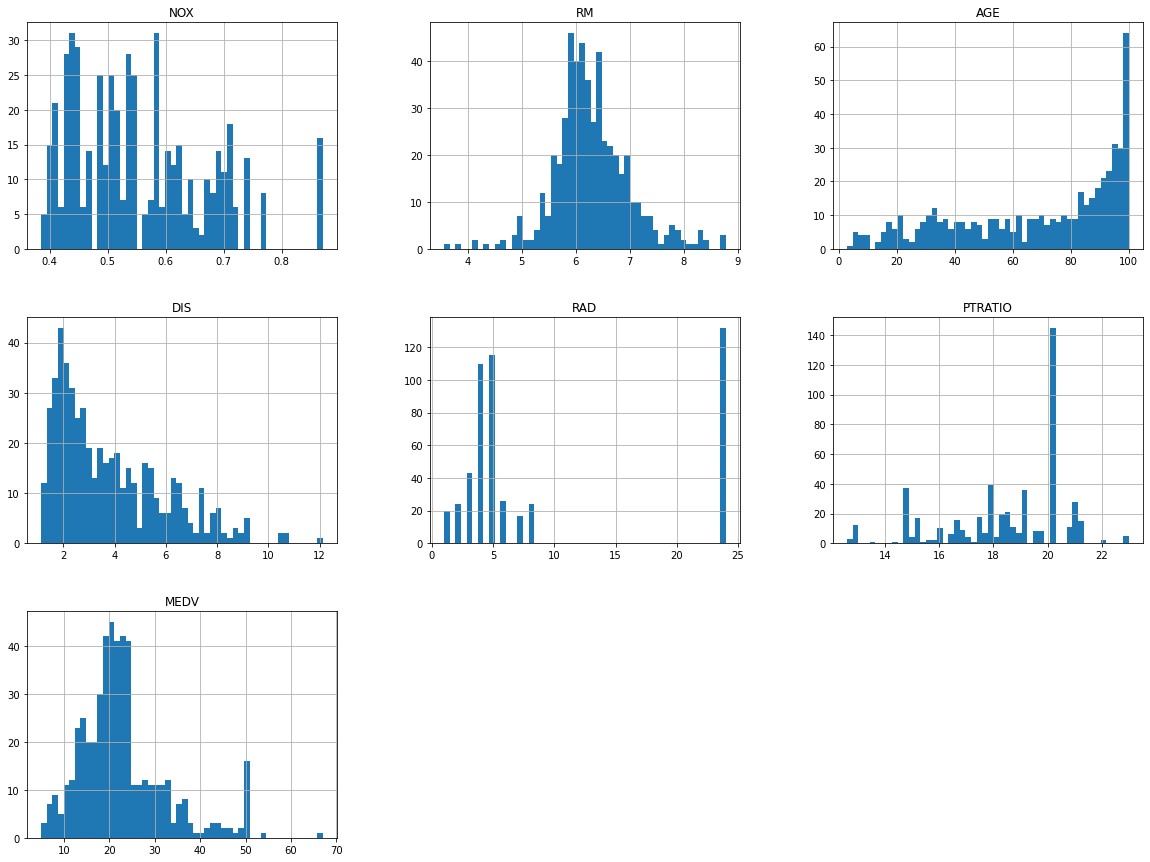

<IPython.core.display.Javascript object>

In [79]:
data1.hist(bins=50, figsize=(20, 15))

Pairwise plots for more precise overview:

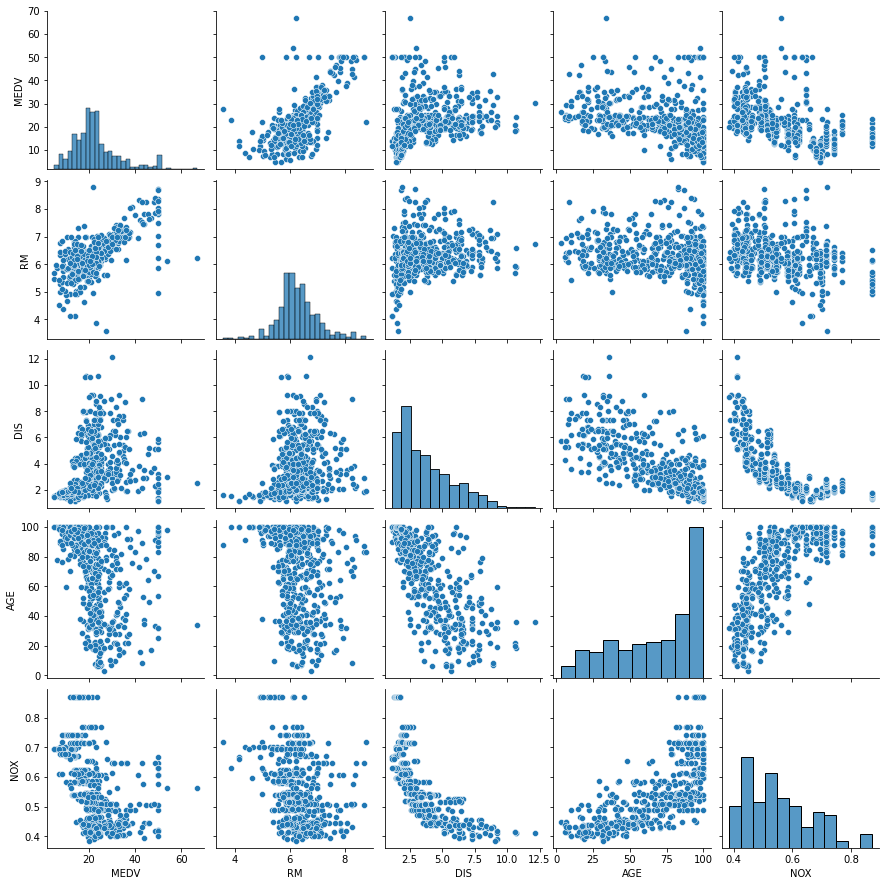

<IPython.core.display.Javascript object>

In [80]:
sns.pairplot(data1[["MEDV", "RM", "DIS", "AGE", "NOX"]])

---
### Single histograms for precise analysis

It is expected that most expensive houses are located near to the city centre.  

The graph below shows dependency of distance from city centre to house on price of house. From the graph we can conclude that on average closest to the centre houses are rather extremeley low priced or high priced.

In [81]:
px.histogram(
    data[["MEDV", f"{nm}DIS"]],
    x="MEDV",
    color=f"{nm}DIS",
    marginal="box",
    title="Distance to the city centre over Price of house",
    height=700,
    histfunc="count",
    labels={
        "MEDV": "Price of House in 1000 USD",
        "y": "Number of houses",
        f"{nm}DIS": "Distance",
    },
).update_layout(yaxis_title="Number of houses").show()

<IPython.core.display.Javascript object>

It is expected that the more rooms in a house, the higher its price.  

The graph below shows dependency of number of rooms on price of house. From the graph we can conclude that on average the more house is expensive, the more rooms it has, as expected.

In [82]:
px.histogram(
    data[["MEDV", f"{nm}RM"]],
    x="MEDV",
    color=f"{nm}RM",
    marginal="box",
    title="Number of Rooms over Price of house",
    height=700,
    labels={"MEDV": "Price of house in 1000 USD", f"{nm}RM": "№ Rooms"},
).update_layout(yaxis_title="Number of houses").show()

<IPython.core.display.Javascript object>

It is expected that the lower the concentration of nitric oxides, the higher the price of the house.

The graph below shows dependancy of nitric oxides concentration on price of house. From the graph we can conclude that on average the more house is expensive, the cleaner the air around it.

In [83]:
px.histogram(
    data[["MEDV", f"{nm}NOX"]],
    x="MEDV",
    color=f"{nm}NOX",
    marginal="box",
    title="Nitric oxides concentration over Price of house",
    height=700,
    labels={
        "MEDV": "Price of house in 1000 USD",
        f"{nm}NOX": "NOX",
    },
).update_layout(yaxis_title="Number of houses").show()

<IPython.core.display.Javascript object>

The graph below shows dependency of pupil rate in town on price of house. From the graph we can conclude that there is no determined dependency between these two values.

In [84]:
px.histogram(
    data[["MEDV", f"{nm}PTRATIO"]],
    x="MEDV",
    color=f"{nm}PTRATIO",
    marginal="box",
    title="Pupil rate in town over Price of house",
    height=700,
    labels={"MEDV": "Price of house in 1000 USD", f"{nm}PTRATIO": "PTRATIO"},
).update_layout(yaxis_title="Number of houses").show()

<IPython.core.display.Javascript object>

It is expected that the newer the house, the higher its price.

The graph below shows dependency of age of house on its price. From the graph we can conclude that on average old houses are rather extremely cheap or expensive, while the age of average priced house varies from 10 to 90 years in almost equal proportions.

In [85]:
px.histogram(
    data[["MEDV", f"{nm}AGE"]],
    x="MEDV",
    color=f"{nm}AGE",
    marginal="box",
    title="Age of house over its Price",
    height=700,
    labels={"MEDV": "Price of house in 1000 USD", f"{nm}AGE": "Age"},
).update_layout(yaxis_title="Number of houses").show()

<IPython.core.display.Javascript object>

The graph below shows dependency of railway accessibility on price. From the graph we can conclude that RAD doesn't matter much for both expensive and cheap houses, while for the average priced houses plays a role

In [86]:
px.histogram(
    data[["MEDV", f"{nm}RAD"]],
    x="MEDV",
    color=f"{nm}RAD",
    marginal="box",
    title="Railway accessibility over Price of house",
    height=700,
    labels={"MEDV": "Price of house in 1000 USD", f"{nm}RAD": "RAD"},
).update_layout(yaxis_title="Number of houses").show()

<IPython.core.display.Javascript object>

The graph below shows dependency of age of house on number of rooms in it. From the graph we can conclude that 90% of houses have 6-7 rooms, that old houses on average tend to have less rooms than new and that houses with the smallest amount of room are almost all old, from all of the stated above we can state that average house has more rooms over time

In [87]:
px.histogram(
    data[[f"{nm}AGE", f"{nm}RM"]],
    x=f"{nm}RM",
    color=f"{nm}AGE",
    title="Age of house over Number of rooms in it",
    height=700,
    labels={f"{nm}RM": "Number of rooms in the house", f"{nm}AGE": "Age"},
).update_layout(yaxis_title="Number of houses").show()

<IPython.core.display.Javascript object>

The graph below shows dependency of nitric oxides concentration on distance of house from the city centre. From the graph we can conclude that on average the more house is distanced from the city centre, the lower the concentration of nitric oxides in air around it.

In [88]:
px.histogram(
    data[[f"{nm}NOX", f"{nm}DIS"]],
    x=f"{nm}DIS",
    color=f"{nm}NOX",
    marginal="box",
    title="Nitric oxides concentration over Distance",
    height=700,
    labels={
        f"{nm}DIS": "Distance from the city centre to the house",
        f"{nm}NOX": "NOX",
    },
).update_layout(yaxis_title="Number of houses").show()

<IPython.core.display.Javascript object>

---

# Linear regressions

In [89]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

<IPython.core.display.Javascript object>

let's write a function for plotting a regression

In [90]:
def plot_linear_regression(x, y, ttpe="lowess", ttle="", ttle_x="", ttle_y=""):
    x_train, x_test, y_train, y_test = train_test_split(
        data[[x]], data[y], test_size=0.3, random_state=100
    )
    # splitting the dataset for training and testing
    slr = LinearRegression()
    slr.fit(x_train, y_train)
    # fitting the model
    # print("Intercept: ", slr.intercept_)
    # print("Coefficient: ", slr.coef_)
    y_pred_slr = slr.predict(x_test)
    # print(y_pred_slr)
    # prediction
    df = pd.concat(
        [
            x_test,
            y_test,
            pd.DataFrame(data=map(lambda x: [x], y_pred_slr), columns=["y_pred"]),
        ],
        axis=1,
        join="inner",
    )
    return px.scatter(
        df,
        x=x,
        y=y,
        trendline=ttpe,
        trendline_color_override="Red",
        title=ttle,
        marginal_y="box",
        marginal_x="violin",
        height=750,
        labels={x: ttle_x, y: ttle_y},
    ).show()

<IPython.core.display.Javascript object>

UPD: over time I found better alternative to sklearn, but it still handles the data processing

---

It is expected that the high the accessibility of railways, the higher the price of the house.

The graph below shows dependency of railway accessibility on price. From the graph we can conclude that the more house expensive, the less railway accessibility is important to it. It may be because wealthy people on average prefer personal transport rather than public.

In [91]:
plot_linear_regression(
    "MEDV",
    "RAD",
    "ols",
    "Railway Accessibility Index of house over its Price",
    "Price of house in 1000 USD",
    "Railway Accessibility Index",
)

<IPython.core.display.Javascript object>

It is expected that the more rooms in a house, the higher its price.  

The graph below shows dependency of room number on price. From the graph we can conclude that with good precision the more house is expensive, the more rooms it has. It may be so as wealthy people prefer bigger houses with more rooms as they can afford them, and consequently, expensive houses is built with more rooms than average houses.

In [92]:
plot_linear_regression(
    "MEDV",
    "RM",
    "ols",
    "Number of Rooms in house over its Price",
    "Price of house in 1000 USD",
    "Number of Rooms in house",
)

<IPython.core.display.Javascript object>

It is expected that the newer the house, the higher its price.  

The graph below shows dependency of age of house on its price. From the graph we can conclude that that on average the newer the house, the more expensive it is. However, there are a lot of deviations from a trendline, so some exceptions should be considered. It may be caused by many effects, but on my sight the main are that old expensive houses can be a historical legacy and cheap houses may be a consequence of tradeoff of location and price, so that better location is preferred rather than quality of communications.

In [93]:
plot_linear_regression(
    "MEDV",
    "AGE",
    "ols",
    "Age of house over its Price",
    "Price of house in 1000 USD",
    "Age of house",
)

<IPython.core.display.Javascript object>

It is expected that the lower the concentration of nitric oxides, the higher the price of the house.

The graph below shows dependency of nitric oxides concentration around the house on its price. From the graph we can conclude that better the air surrounds the house the more the valuable the house. Well, that was actually obvious from the very beginning, but we proved it statistically, so that now we can be sure that it is so.

In [94]:
plot_linear_regression(
    "MEDV",
    "NOX",
    "ols",
    "Nitric oxides concentration over Price of house",
    "Price of house in 1000 USD",
    "Nitric oxides concentration in air around the house",
)

<IPython.core.display.Javascript object>

It is expected that the closer the house to the city centre, the higher its price

The graph below shows dependency of distance from the house to the city centre on its price. From the graph we can conclude that on average the more house is distanced from the city, the more valuable it is. Such a conclusion is actually quite contradictory for me, but, well, statistics knows better. It may be so as people prefer to be further from the city to unite with nature and relax from urban hustle and bustle, as they anyway visit it almost every day for work.

In [95]:
plot_linear_regression(
    "MEDV",
    "DIS",
    "ols",
    "Distance to the city centre over Price of house",
    "Price of house in 1000 USD",
    "Distance from the house to the city centre",
)

<IPython.core.display.Javascript object>

It is expected that concentration of nitric oxides drops as its gets farther from the city centre.

The graph below shows dependency of nitric oxides concentration in the air around the house on distance to the city centre from it. From the graph we can conclude that as expected the farther the house is from the city centre, the lower the concentration of oxides of air.

In [96]:
plot_linear_regression(
    "DIS",
    "NOX",
    "ols",
    "Nitric oxides concentration over Distance",
    "Distance from the city centre to the house",
    "Nitric oxides concentration in the air around the house",
)

<IPython.core.display.Javascript object>

---

# Conclusion

Well, as we can see above, most of my statements were confirmed, although, there are some that were refuted. Let's state them further:

> *House is more valuable if it is distanced from city centre, has clean air in its surroundings, has a lot of rooms and in average is of moderate age*

As we can see on the graphs, the air conditions near house gets better as house is more distanced from the city, so that we can say that ecology is more important to people, rather than time to get to work. What comes to age, maybe, as I stated before, people alter communications quality for better location, while for expensive houses they prefer to live in historical legacy and doesn't want to move out for personal reasons.